In [54]:
import json
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import FancyArrowPatch
# Load the JSON files
file_paths = {
    "M_Naive": '../results/metrics_PRED_mse_lstm_naive_hour.json',
    "M_Stacked": '../results/metrics_PRED_mse_lstm_stacked_hour.json',
    "M_Seq2Seq": '../results/metrics_PRED_lstm_seq2seq_additive_corrected_hour.json',
    "M_RegSeq2Seq": '../results/metrics_PRED_mse_lstm_seq2seq_additive_regu_31_07_hour.json',
    "SMARD": '../results/metrics_SMARD_lstm_seq2seq_additive_corrected_hour.json'
}

model_colors = {
    "M_Naive": "#8785BA",
    "M_Stacked": "#C195C4",
    "M_Seq2Seq": "#95AAD3",
    "M_RegSeq2Seq": "#06948E",
    "SMARD": "#A9A9A9"  # Gray tone for SMARD
}

data = {}



In [107]:
# Load the data from JSON files
for model, file_path in file_paths.items():
    with open(file_path) as f:
        data[model] = json.load(f)

# Prepare data for plotting
models = ["M_Naive", "M_Stacked", "M_Seq2Seq", "M_RegSeq2Seq", "SMARD"]
metrics = ["MAE", "MAPE", "RMSE"]
categories = ["Total Energy Consumption", "Total Energy Generation"]

metric_data = {category: {model: [] for model in models} for category in categories}

for model in models:
    metric_data["Total Energy Consumption"][model] = [
        data[model]["total_load_mwh"]["MAE"],
        data[model]["total_load_mwh"]["MAPE"],
        data[model]["total_load_mwh"]["RMSE"]
    ]
    metric_data["Total Energy Generation"][model] = [
        data[model]["total_production_mwh"]["MAE"],
        data[model]["total_production_mwh"]["MAPE"],
        data[model]["total_production_mwh"]["RMSE"]
    ]

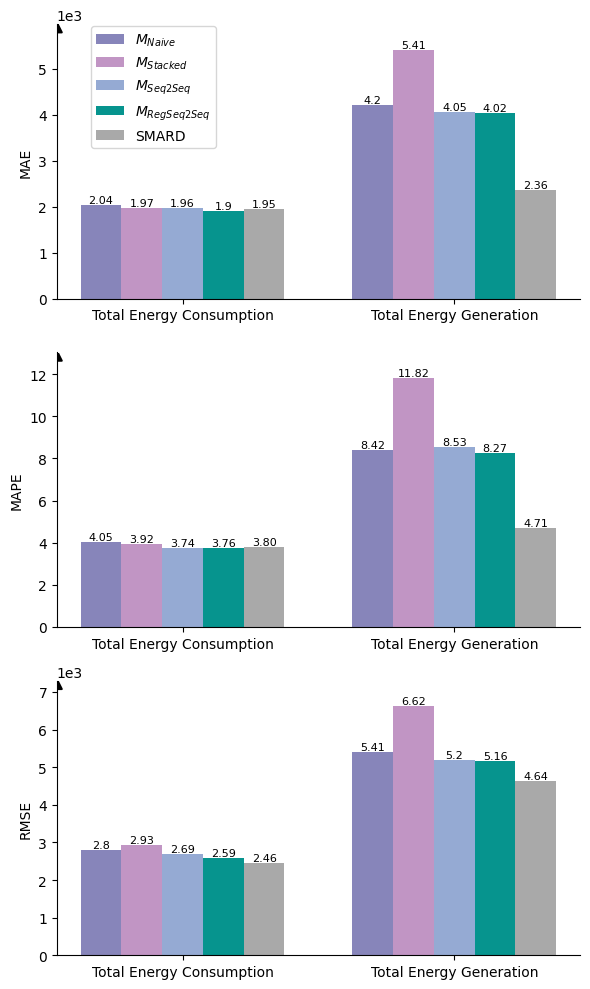

In [109]:
x = np.arange(len(categories))  # label locations
# Adjust the width and positioning
width = 0.15  # Width of individual bars
group_width = width * len(models) * 200

fig, axs = plt.subplots(3, 1, figsize=(6, 10))

for i, metric in enumerate(metrics):
    cons_vals = [metric_data["Total Energy Consumption"][model][i] for model in models]
    prod_vals = [metric_data["Total Energy Generation"][model][i] for model in models]
    
    # Calculate positions dynamically
    # Set the base x position for the first bar of each group, then shift by half of total group width to center labels
    base_x_positions = [x_val - group_width/2 + (group_width/2) for x_val in x]

    for j, model in enumerate(models):
        # Calculate individual bar positions
        cons_pos = [base_x_positions[0] + j * width]
        prod_pos = [base_x_positions[1] + j * width]

        # Plotting bars for Consumption and Production
        bars_cons = axs[i].bar(cons_pos, cons_vals[j], width, label=model if i == 0 else "", color=model_colors[model])
        bars_prod = axs[i].bar(prod_pos, prod_vals[j], width, color=model_colors[model])
        
        # Adding text annotations on top of the bars
        for bar in bars_cons + bars_prod:
            yval = bar.get_height()
            if i != 1:
                # Format the y-value to 2 decimal places
                yval_label = f'{(yval/1000).round(2)}'
            else:
                yval_label = f'{yval:.2f}'
            axs[i].text(bar.get_x() + bar.get_width()/2, yval, yval_label, ha='center', va='bottom', fontsize=8)
    
    # Setting labels and titles
    axs[i].set_ylabel(metric)
    # Make the Y axsis scientific notation
    if i != 1:
        axs[i].ticklabel_format(axis='y', style='sci', scilimits=(0,0))
    # Set x-ticks to the middle of each group
    axs[i].set_xticks([np.mean(base_x_positions[0] + (len(models)-1)*width/2), np.mean(base_x_positions[1] + (len(models)-1)*width/2)])
    axs[i].set_xticklabels(categories)
    # Enhance aesthetics by removing unnecessary spines
    axs[i].spines['top'].set_visible(False)
    axs[i].spines['right'].set_visible(False)
    # Adjust the y-axis limit to create space for the arrow
    ylim = axs[i].get_ylim()
    axs[i].set_ylim(ylim[0], ylim[1] * 1.05)

    # Adding arrowhead to the y-axis moved more to the left
    arrow = FancyArrowPatch((-0.16, ylim[1]* 1.03), (-0.16, ylim[1] * 1.07), arrowstyle='-|>', mutation_scale=15, color='k', lw=1.5)
    axs[i].add_patch(arrow)
# Add legend with formatted model labels, only to the first subplot
handles, _ = axs[0].get_legend_handles_labels()
labels = [r"$M_{Naive}$", r"$M_{Stacked}$", r"$M_{Seq2Seq}$", r"$M_{RegSeq2Seq}$", "SMARD"]
# anchors the legend to the upper right corner
fig.legend(handles, labels, loc='upper right', bbox_to_anchor=(0.38, 0.975))

fig.tight_layout()
plt.show()


In [110]:
# save as pdf and png
fig.savefig('../plots/figures/ba_evaluation_metrics.pdf', bbox_inches='tight', dpi=600)
fig.savefig('../plots/figures/ba_evaluation_metrics.png', bbox_inches='tight', dpi=600)